In [190]:
import galpy
import numpy as np
import matplotlib.pyplot as plt
import StreamModel as sm
from galpy.orbit import Orbit
from galpy.potential import NFWPotential
from astropy import units
from scipy.interpolate import interp1d
from matplotlib import gridspec
import seaborn

In [256]:
mass = 1.e8
rstream = 9800.
rsub = 625.
impact = 0.
subvel = [150.,0.,0.]
nstars = 1000
sigmav = 2.
std = [[0.,0.,0.],[0.,0.,0.]]

teststream = sm.Stream(mass,rstream,rsub,impact,subvel,450.)
stream = sm.MessyStreamData(mass,rstream,rsub,impact,subvel,0.,nstars,sigmav,std)
psi0 = stream.psi0
vkick = stream.calc_dv(psi0)
vkick[1] = vkick[1] + stream.noisyvy

nfwp= NFWPotential(normalize=1.,a=14./10.)
t = np.linspace(0,450,10000)*units.Myr

#[R,vR,vT(,z,vz,phi)]
#[ro,v'_x,v'_y,0.,v'_z,,psi_0]

psi = np.zeros(nstars)
vx = np.zeros(nstars)
x = np.zeros(nstars)
y = np.zeros(nstars)

for i in range(len(psi0)):
    o = Orbit(vxvv=[rstream*units.pc,vkick[0][i]*units.km/units.s,vkick[1][i]*units.km/units.s,0.*units.pc,vkick[2][i]*units.km/units.s,psi0[i]*units.rad],ro=10.*units.kpc,vo=168.2*units.km/units.s)
    o.integrate(t,nfwp)
    psi[i] = o.phi(t[-1])
    vx[i] = o.vR(t[-1])
    x[i] = o.x(t[-1])
    y[i] = o.y(t[-1])
    
print('Finished Integrating the Orbits.')



Finished Integrating the Orbits.


In [263]:
testo = Orbit(vxvv=[rstream*units.pc,0.*units.km/units.s,teststream.vy*units.km/units.s,0.*units.pc,0.*units.km/units.s,0.*units.rad],ro=10.*units.kpc,vo=168.2*units.km/units.s)
testo.integrate(t,nfwp)
centrepsi = testo.phi(t[-1])

psi = (psi)%np.pi - centrepsi

f = interp1d(teststream.psi,teststream.psi0)
testpsi = f(psi0)

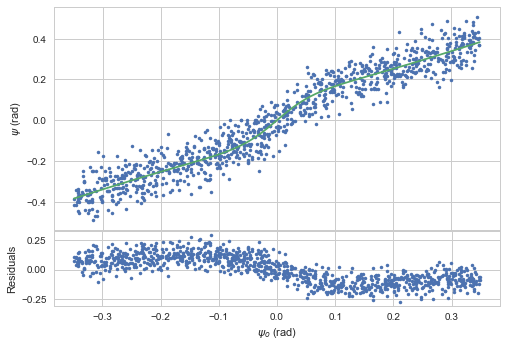

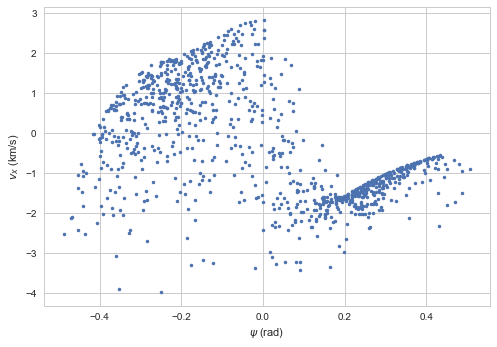

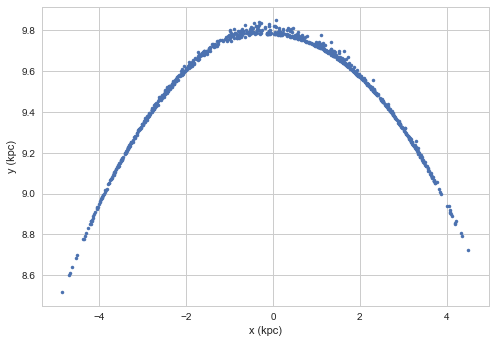

In [264]:
seaborn.set_style(style='whitegrid')

fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax0.plot(psi0,psi,'.') 
ax0.plot(teststream.psi0,teststream.psi,'-')
ax1.set_xlabel(r'$\psi_o$ (rad)')
ax1.set_ylabel(r'Residuals')
ax0.set_ylabel(r'$\psi$ (rad)')
ax1.plot(psi0,testpsi-psi,'.')
fig.subplots_adjust(hspace=0.01)

plt.figure()
plt.plot(psi,vx,'.')
#plt.plot(-psi,-vx,'.')
#plt.plot(teststream.psi,teststream.dxdot[0])
plt.xlabel(r'$\psi$ (rad)')
plt.ylabel(r'$v_x$ (km/s)')

plt.figure()
plt.plot(x,y,'.')
plt.xlabel('x (kpc)')
plt.ylabel('y (kpc)')

plt.show()

In [265]:
psiSpread = np.std(psi-testpsi)
print(psiSpread)

0.115070987255
